In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
 
data_path = "C:\\Users\\latha\\Downloads\\Assignment\\2024 Assignment\\2004 - AI Exp\\breast+cancer+wisconsin+diagnostic\\wdbc.data"
 
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
 
# Load the dataset
df = pd.read_csv(data_path, header=None, names=column_names)
 
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})
 
df.head()

ID  Diagnosis  feature_1  feature_2  feature_3  feature_4  feature_5  \
0    842302          1      17.99      10.38     122.80     1001.0    0.11840   
1    842517          1      20.57      17.77     132.90     1326.0    0.08474   
2  84300903          1      19.69      21.25     130.00     1203.0    0.10960   
3  84348301          1      11.42      20.38      77.58      386.1    0.14250   
4  84358402          1      20.29      14.34     135.10     1297.0    0.10030   

   feature_6  feature_7  feature_8  ...  feature_21  feature_22  feature_23  \
0    0.27760     0.3001    0.14710  ...       25.38       17.33      184.60   
1    0.07864     0.0869    0.07017  ...       24.99       23.41      158.80   
2    0.15990     0.1974    0.12790  ...       23.57       25.53      152.50   
3    0.28390     0.2414    0.10520  ...       14.91       26.50       98.87   
4    0.13280     0.1980    0.10430  ...       22.54       16.67      152.20   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  \
0      2019.0      0.1622      0.6656      0.7119      0.2654      0.4601   
1      1956.0      0.1238      0.1866      0.2416      0.1860      0.2750   
2      1709.0      0.1444      0.4245      0.4504      0.2430      0.3613   
3       567.7      0.2098      0.8663      0.6869      0.2575      0.6638   
4      1575.0      0.1374      0.2050      0.4000      0.1625      0.2364   

   feature_30  
0     0.11890  
1     0.08902  
2     0.08758  
3     0.17300  
4     0.07678  

[5 rows x 32 columns]

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
 
# Splitting the dataset into training and testing sets
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
 
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)
 
# Predictions
y_pred = model.predict(X_test_scaled)
 
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.9736842105263158
Confusion Matrix:
[[70  1]
 [ 2 41]]


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 330.3 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/294.9 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00


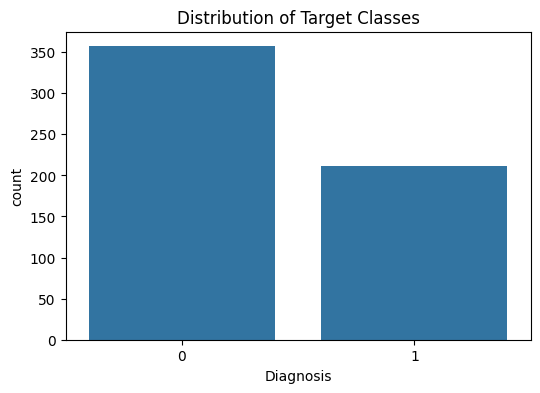

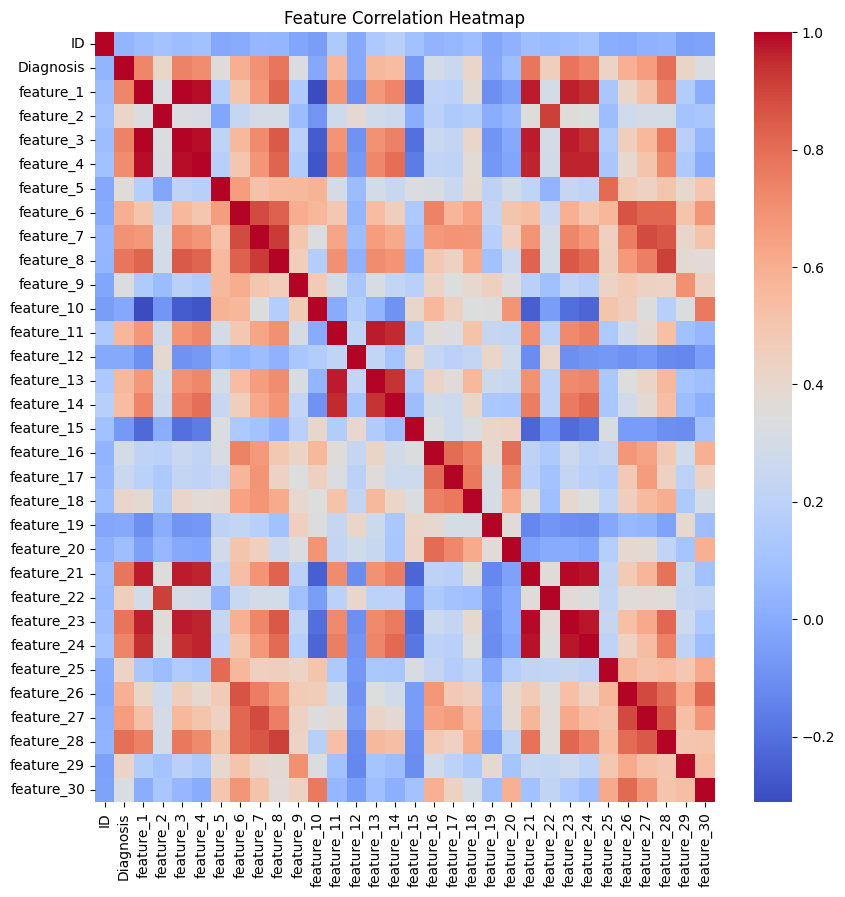

In [7]:
!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns
 
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df)
plt.title('Distribution of Target Classes')
plt.show()
 
# Correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()
 